# II. HÁZI FELADAT

Ezt a feladatsort tetszőleges programozási nyelven meg lehet oldani, de a forráskódot minden esetben mellékelni kell. A python és octave megoldások programkódja kerülhet a jupyter notebookba. A programok legyenek modulárisak, használjanak függvényeket! A kimeneti adatok ábrázolásához minden esetben használjuk a jupyter notebookot! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

# Oszcillátorok numerikus vizsgálata

$$ \def\dd{{\textrm{d}}} $$

Oszcillátoroknak olyan dinamikai rendszereket nevezünk, melyek mozgása az idő periodikus vagy kvázi-periodikus függvényeként írható le. Az egydimenziós oszcillátor mozgásegyenlete

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} $$

alakban írható. Egy szabad oszcillátor teljes energiája mindaddig megmarad, amíg a rendszerben nem hat súrlódási erő (csillapított oszcillátor), illetve nem hatunk rá külső erővel (gerjesztett oszcillátor). Az oszcillátor teljes energiája a kinetikus és a potenciális energia összege, azaz

$$ E_{\textrm{tot}} = \frac{m v^2}{2} + V(x)$$

## Harmonikus oszcillátor

Amennyiben a $V(x)$ potenciál négyzetes, abban az esetben harmonikus oszcillátorról beszélünk:

$$\begin{eqnarray}
    V(x) & = & \frac{1}{2}kx^2 \\
    m \frac{\dd^2x}{\dd t^2} & = & - k x.
\end{eqnarray}$$

A harmonikus oszcillátor mozgásegyenlete analitikusan is megoldható. A megoldás

$$ x(t) = A \cos( \omega t + \phi ) $$

alakú, ahol $A$ az amplitúdó - vagyis a legnagyobb kitérés -, $\omega$ a körfrekvencia és $\phi$ a kezdőfázis $t = 0$-ban. A harmonikus oszcillátor körfrekvenciáját a potenciálban szereplő $k$ állandó és az $m$ tömeg jellgű mennyiség határozza meg:

$$ \omega = \sqrt{\frac{k}{m}} = \frac{2\pi}{T}, $$

ahol $T$ a pediódusidő, melyből $f = 1/T$ módon kaphatjuk meg a frekvenciát.

## Anharmonikus oszcillátor

Az anharmonikus abban különböznek a harmonikus oszcillátortól, hogy a mozgásukat meghatározó potenciál nem négyzetes alakú. Néhány lehetséges anharmonikus potenciál:

* Negyedrendű potenciál

$$ V(x) = \frac{1}{4}kx^4 $$

* Lennard-Jones potenciál

$$ V(x) = V_0 \left[ \left( \frac{x_0}{x} \right)^{12} - 2 \left( \frac{x_0}{x} \right)^{6} \right] $$

## Csillapított és gerjesztett oszcillátor

A csillapított és/vagy gerjesztett oszcillátorok mozgásegyenletében megjelenik egy sebességtől függő és egy további, többnyire időfüggő külső erőtag is:

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} - c \frac{\dd x}{\dd t} + F(t) $$

Csillapított és szinuszosan gerjesztett oszcillátorok viselkedése analitikusan is egyszerűen vizsgálható. Az alábbi feladatokban ezért ezektől eltérő rendszereket vizsgálunk numerikus módszerek segítségével.

# Feladatok

## 1. feladat

Számítsuk ki a fent felírt két anharmonikus potenciálhoz tartozó erőt.

Mivel a potenciálból erőt az alábbi képlettel számoljuk ki:
$$ F_x = - grad V_x $$

#### Negyedrendű potenciál
$$ V(x) = \frac{1}{4}kx^4 $$
Így a hozzá tartozó erő $$F_{(x)} = - kx^3 $$

#### Lennard-Jones potenciál
$$ V(x) = V_0 \left[ \left( \frac{x_0}{x} \right)^{12} - 2 \left( \frac{x_0}{x} \right)^{6} \right] $$
Így a hozzá tartozó erő 
$$ F(x) = 12V_0\left( \frac{x_0^{6}}{x^{7}} - \frac{x_0^{12}}{x^{13}} \right) $$

## 2. feladat

Írjunk olyan függvényeket, melyek kiszámítják a harmonikus potenciált, az ehhez tartozó erőt, illetve az 1. feladatban felírt anharmonikus potenciálokat és erőket. Ábrázoljuk a potenciálokat és az erőket grafikonon!

In [5]:
import matplotlib.pyplot as plt
import numpy as np

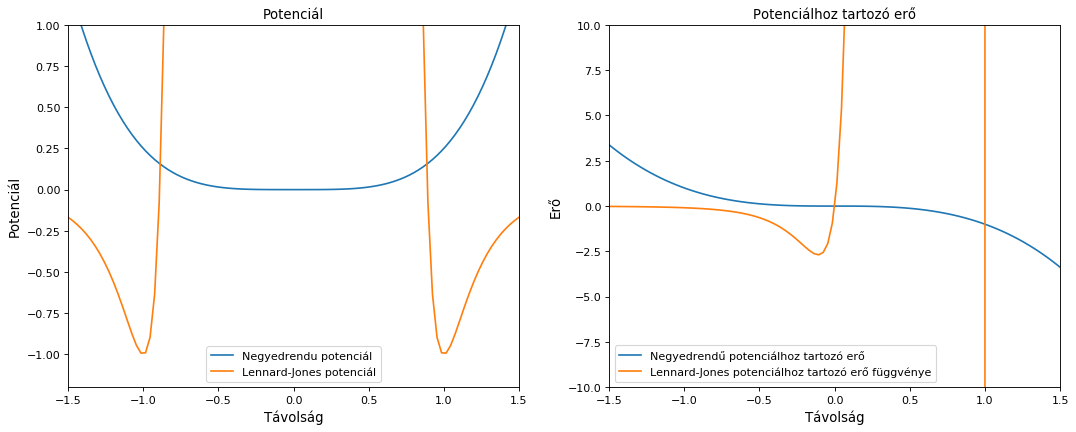

In [2]:
def negyedrendu_pot(x, n):
    x = np.linspace(x[0],x[1],n);
    yV = (1/4)*1*x**4;
    return x, yV

def negyedrendu_ero(x, n):
    x = np.linspace(x[0],x[1],n);
    yF = - x**3;
    return x, yF

def lennardjones_pot(x, n, x0, v0):
    x = np.linspace(x[0],x[1],n);
    yV = v0*(((x0/x)**12)-(2*(x0/x)**6));
    return x, yV

def lennardjones_ero(x, n, x0, v0):
    x = np.linspace(x[0],x[1],n);
    yF = 12*v0*(((x0**6/(x-x0)**7)-(x0**12/(x-x0)**13)));
    return x, yF
    
i= [-1.5, 1.5]
negyedrendu_pot = negyedrendu_pot(i, 100)
negyedrendu_ero = negyedrendu_ero(i, 100)
lennardjones_pot = lennardjones_pot(i, 100, 1, 1)
lennardjones_ero = lennardjones_ero(i, 100, 1, 1)

plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title('Potenciál')  
plt.xlim(i[0],i[1])
plt.ylim(-1.2,1)
plt.plot(negyedrendu_pot[0],negyedrendu_pot[1], linestyle='-', label='Negyedrendu potenciál')
plt.plot(lennardjones_pot[0],lennardjones_pot[1], linestyle='-', label="Lennard-Jones potenciál")
plt.xlabel('Távolság', fontsize = '12')
plt.ylabel('Potenciál', fontsize = '12')
plt.legend()
plt.subplot(1,2,2)
plt.title('Potenciálhoz tartozó erő')
plt.xlim(i[0],i[1])
plt.ylim(-10,10)
plt.plot(negyedrendu_ero[0],negyedrendu_ero[1], linestyle='-', label="Negyedrendű potenciálhoz tartozó erő")
plt.plot(lennardjones_pot[0],lennardjones_ero[1], linestyle='-', label="Lennard-Jones potenciálhoz tartozó erő függvénye")
plt.xlabel('Távolság', fontsize = '12')
plt.ylabel('Erő', fontsize = '12')
plt.legend()

### ToDo: Deriváltja hol nulla

## 3. feladat

Integráljuk a harmonikus és Lennard-Jones-potenciállal meghatározott oszcillátorok mozgásegyenletét egyszerű negyed rendű Runge-Kutta-módszerrel vagy a Dormand-Prince-féle 5(4)-ed rendű, adaptív lépéshossz-választásos módszerrel. Az integráláshoz használjunk szabadon elérhető programcsomagot, pl.:

* python: scipy.integrate.RK45
* octave: ode45
* C: GSL ODE csomag
* C++: Boost.Numeric.Odeint csomag

Ábrázoljuk az egyenlet változóinak időfejlődését, a teljes energiát és a lépéshosszt az idő függvényében!

rk45 = RK45(függvény, 
            t0 honnan indul integrálás, 
            y0 kezdeti értékek (vektor tuple, list,...), 
            meddig menjen az integrátor, 
            adjunk meg jo nagy számot)

In [2]:
from scipy.integrate import RK45

array([[1.        , 1.        ],
       [1.04745421, 1.06443457],
       [1.21460905, 1.58120453],
       [1.6634494 , 2.39081037],
       [2.63920852, 2.87698824],
       [4.46660265, 3.06543346],
       [8.59830737, 3.13632023]])

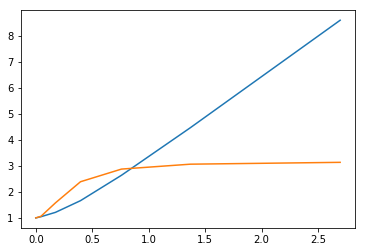

In [6]:
def lennardjones_ero(t, y):
    x0 = 1;
    v0 = 1;
    m = 1;
    dx = y[1];
    dv = 12*v0*(((x0**5/(y[0])**3)-(x0**11/(y[0])**9))/m);
    return (dx, dv)

y0 = np.array([1, 1])

ty = RK45(lennardjones_ero,0,y0, np.inf)
t = np.zeros(7)
y = np.empty((np.shape(t)[0],ty.y.shape[0]))

# for i in range(100):
#     print(ty.t, ty.y)
#     ty.step()

for i in range(7):
    t[i] = ty.t
    for j in range(ty.y.shape[0]):
        y[i:,j]=ty.y[j]
    ty.step()
    
plt.plot(t,y[:,0])
plt.plot(t,y[:,1])
# t, y
y

## 4. feladat

Interpoláljuk a 3. feladatból kapott megoldásokat időben egyenletes lépésközzel, lineárisan és köbös spline-ok segítségével!

In [ ]:
# megoldás helye

## 5. feladat

Számítsuk ki, és ábrázoljuk a felprogramozott oszcillátorok Fourier-spektrumát. Mit figyelhetünk meg?

In [ ]:
# megoldás helye

## 6. feladat

Programozzunk be kaotikus oszcillátort!$^1$ Egy szinuszosan gerjesztett oszcillátor esetében a kaotikus viselkedés feltétele, hogy a visszatérítő erő ne lineáris függvénye legyen a kitérésnek. Ábrázoljuk a kitérés és a sebesség időfüggését, valamint a teljesítményspektrumot! Futassuk az integrálást legalább 1 millió lépésig, és ábrázoljuk a rendszer Poincaré-metszetét, azaz a sebességet a kitérés függvényében az $\omega t = n \cdot 2 \pi, n = 1, 2, 3, ... $ feltétel mellett!

$^1$ http://sprott.physics.wisc.edu/pubs/paper265.pdf